# super_store_sales

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#df = pd.read_csv(r"C:\Users\JONATHAN\Downloads\Sample - Superstore.csv")
# this didn't work because the  file isn’t fully UTF-8 encoded, and pandas is trying to read it as UTF-8 by default.

# Try reading with 'latin1' (ISO-8859-1) encoding
df = pd.read_csv(r"C:\Users\JONATHAN\Downloads\Sample - Superstore.csv", encoding='latin1')


# OR try Windows-1252 encoding
# df = pd.read_csv("your_file.csv", encoding='cp1252')

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [44]:
# Remove extra spaces from column names if any
df.columns = df.columns.str.strip()

In [28]:
print(df['Order Date'].dtype)

datetime64[ns]


In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
# Drop rows where 'Order Date' couldn't be converted
df = df.dropna(subset=['Order Date'])

# Sales Trend Analysis

In [49]:



# Extract month
df['month'] = df['Order Date'].dt.to_period('M')
df['year'] = df['Order Date'].dt.year

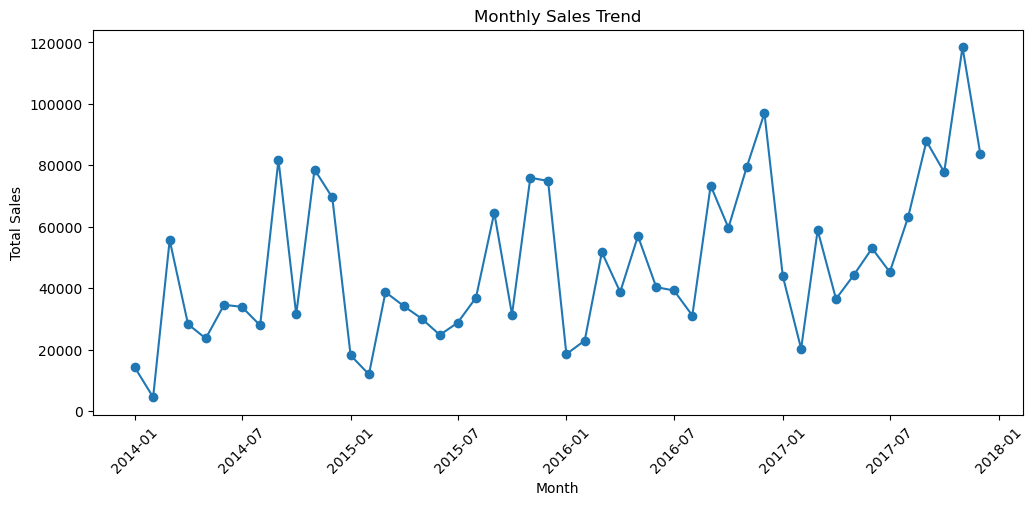

In [71]:
monthly_sales = df.groupby('month')['Sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()  # Convert to datetime for plotting
monthly_sales.to_csv('C:/Users/JONATHAN/Desktop/WORK/monthly_sales_tableau.csv', index=False)
# Plot sales trend
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()

# Outlier Detection

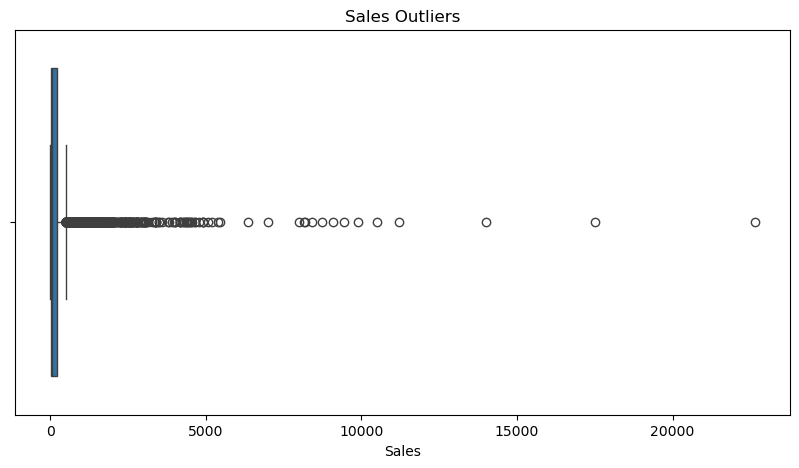

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sales'])
plt.title('Sales Outliers')
plt.show()

In [58]:
 #Identify extreme outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < Q1 - 1.5*IQR) | (df['Sales'] > Q3 + 1.5*IQR)]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Order ID','Sales','Product Name']].head())

Number of outliers: 1167
          Order ID      Sales  \
1   CA-2016-152156   731.9400   
3   US-2015-108966   957.5775   
7   CA-2014-115812   907.1520   
10  CA-2014-115812  1706.1840   
11  CA-2014-115812   911.4240   

                                         Product Name  
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...  
3       Bretford CR4500 Series Slim Rectangular Table  
7                      Mitel 5320 IP Phone VoIP phone  
10           Chromcraft Rectangular Conference Tables  
11      Konftel 250 Conference phone - Charcoal black  


# Return Analysis

In [75]:
# Assuming negative Profit indicates returned items
returns = df[df['Profit'] < 0]

# Count returns per category
returns_per_category = returns.groupby('Category')['Profit'].count().sort_values(ascending=False)
print("\nReturns per category:")
print(returns_per_category)
returns_per_category.to_csv('C:/Users/JONATHAN/Desktop/WORK/returns_tableau.csv', index=False)



Returns per category:
Category
Office Supplies    886
Furniture          714
Technology         271
Name: Profit, dtype: int64


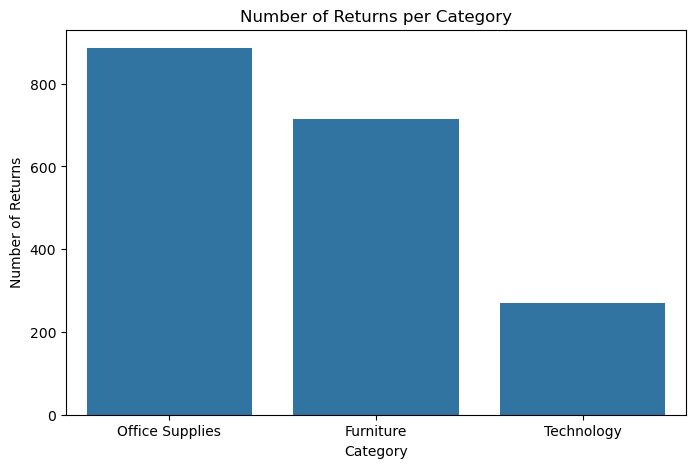

In [63]:
# Plot returns per category
plt.figure(figsize=(8,5))
sns.barplot(x=returns_per_category.index, y=returns_per_category.values)
plt.title('Number of Returns per Category')
plt.ylabel('Number of Returns')
plt.show()

In [65]:
# Optional: Returns over time
returns_monthly = returns.groupby('month')['Profit'].count().reset_index()
returns_monthly['month'] = returns_monthly['month'].dt.to_timestamp()

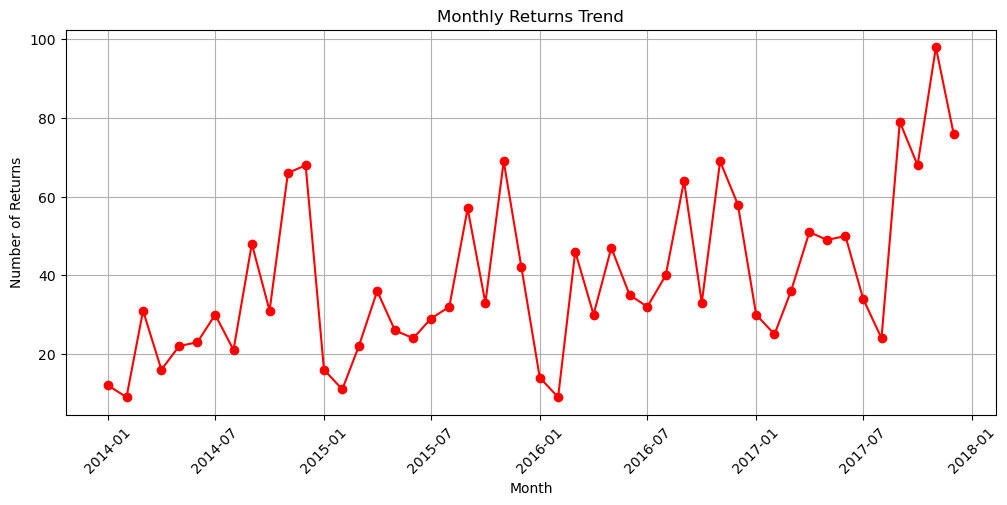

In [67]:

plt.figure(figsize=(12,5))
plt.plot(returns_monthly['month'], returns_monthly['Profit'], marker='o', color='red')
plt.title('Monthly Returns Trend')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()